# Group Project-2 # Customer Segmentation using RFM analysis

Group-3 & members:
- Name (ID): Abhinav Sharma (0753639)
- Name (ID): Nishant Mahajan (0753638)
- Name (ID): Prashanth Nuthula (0753653)
- Name (ID): Sai Sahas Elluru (0753808)
- Name (ID): Siddharth Singh (0756590)

## Customer Segmentation Analysis Part 1

#### Q.  What is Customer Segmentation and why is it important from marketing perspective?

It is the process of making groups of the customers on the basis of their likes and dislikes so that they can market them more efficiently.

This helps the company to gain more knowledge about their customers in terms of money, time and other resources. This process helps them to know the need and want of the customer.

## Import Libraries and Data

In [1]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

# Check encoding in the dataset because if you load the dataset without encoding an error will occur

# pip install chardet
# import the chardet library and use the detect method to find the type of encoding

import chardet 

# 'rb' means read in the file as binary
with open("Sales_data.csv", 'rb') as file:
    print(chardet.detect(file.read()))

In [2]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import chardet

with open("Sales_data.csv", 'rb') as file:
    print(chardet.detect(file.read()))

In [4]:
# Load the dataset
data = pd.read_csv('Sales_data.csv', encoding= 'ISO-8859-1')
# encoding='latin-1'

## Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.shape

(541909, 8)

In [7]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
damages/showroom etc                     1
PINK POLKADOT KIDS BAG                   1
Sale error                               1
CAMOUFLAGE DOG COLLAR                    1
72 CAKE CASES VINTAGE CHRISTMAS          1
Name: Description, Length: 4223, dtype: int64

## Data Preprocessing
- Remove Null Values
- Remove Duplicate Values

In [8]:
# Take all the rows where customer ID not equal to blank
data= data[pd.notnull(data['CustomerID'])]

In [9]:
data.shape

(406829, 8)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
# Removing duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [13]:
filtered_data.shape

(4380, 2)

In [14]:
filtered_data.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [15]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 541768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4380 non-null   object 
 1   CustomerID  4380 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.7+ KB


## Data Insights 
 - Top 10 country customer data 

In [16]:
# Check the country wise distribution
data.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [17]:
filtered_data.Country.value_counts()[:10]


United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

<AxesSubplot:>

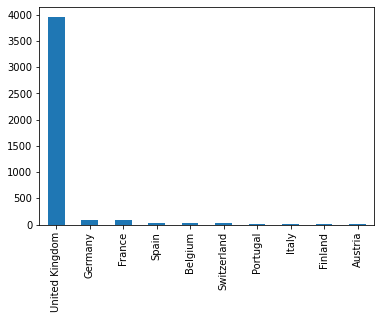

In [18]:
# Plot the data
filtered_data.Country.value_counts()[:10].plot(kind='bar')

####  Q. What do you observe?

UK is on the top most level in terms of selling products and services.

In [19]:
## Filter data by the top most country
uk_data=data[data.Country=='United Kingdom']

In [20]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


#### Q. What do you observe?  Which column needs special attention?

Field 'Quantity' requires special attention because the minimum amount is negative and that can't be negative.

CustomerID has to be integer but here it is float.

In [21]:
uk_data = uk_data[(uk_data['Quantity'] > 0)]

In [22]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [23]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [24]:
# Filter the required columns only
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [25]:
# Calculate Total Price
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

##  Time frame of data

In [26]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

1/10/2011 10:32
9/9/2011 9:52


#### Q. Comment on the above results.

min date is 1 oct and max is 9 sept which can't be true.

## Perform RFM Analysis
- For Recency, Calculate the number of days between present date and date of last purchase for each customer.
- For Frequency, Calculate the number of orders for each customer.
- For Monetary, Calculate sum of purchase price for each customer

In [27]:
# Store a date as a reference point for recency calculations
PRESENT = dt.datetime(2011, 12, 10)

# Convert date to datetime format
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [28]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [29]:
uk_data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [30]:
uk_data['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

#### Q. Comment on the above results

The product with invoice number 576339 has the maximum amount of being sold.There are so many orders for each invoice number which represents frequency of purchases.

In [31]:
orders = uk_data.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'TotalPrice': lambda x: x.sum()}).reset_index()
orders.head()

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [32]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [33]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [34]:
# Rename the columns 
rfm.columns=['monetary','frequency','recency']

In [35]:
rfm['recency'] = rfm['recency'].astype(int)

In [36]:
rfm['monetary'] = rfm['monetary'].astype(int)

In [37]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


####  Q. What is wrong with this table       think ??

In the above table we can see, column names are different. First column should be recency and third coulumn should be monetary.

In [38]:
# Change the column names
rfm.columns=['recency','frequency','monetary']

##  Create Visuals
- Histogram for Recency Data
- Histogram for Frequency Data
- Histogram for Monetary Data


array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

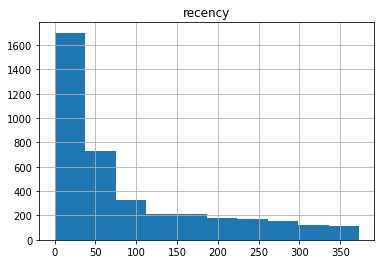

In [39]:
# Histogram for Recency Data (UK)
rfm.hist(column='recency')

####  Q. What does this above chart tell ?

The above histogram gives us the information of customers and their purchase time between Present and last purchase. Most of the customers fall under 50 days of recency. Which means most of the customers are regular buyers. As the recency period increased customers decreased which is a good thing.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

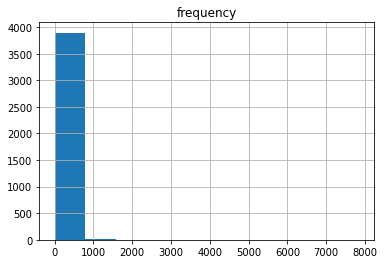

In [40]:
# Histogram for Frequency Data (UK)

rfm.hist(column='frequency')

####  Q. What does this above chart tell ?

This shows that the buying frequency of the customers lies maximum between 0 to 700. Moreover the histogram is highly skewed because of outliers.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

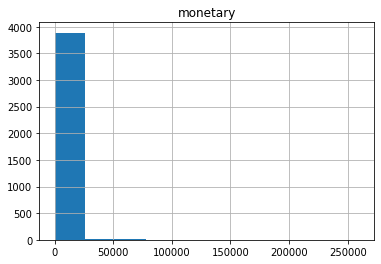

In [41]:
# Histogram for Monetary Data (UK)
rfm.hist(column='monetary')

In [42]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


####  Q. What does this above chart tell ?

The above histogram shows the total amount of money spent per customer. Most of the customers fall under monetary value 30000. Again this histogram as well highly skewed because of few outliers.

In [43]:
# Save the cleaned file
rfm.to_csv('rfm.csv')

## Calcualte the RFM Score 

In [44]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 12.0, 0.4: 32.0, 0.6: 71.0, 0.8: 178.0},
 'frequency': {0.2: 13.0, 0.4: 29.0, 0.6: 58.0, 0.8: 120.0},
 'monetary': {0.2: 241.0, 0.4: 465.0, 0.6: 897.0, 0.8: 1957.0}}

In [45]:

# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions

In [46]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [47]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [48]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score
CustomerID,,,,,,,
12346.0,325,1,77183,1,1,5,115
12747.0,2,103,4196,5,4,5,545
12748.0,0,4596,33719,5,5,5,555
12749.0,3,199,4090,5,5,5,555
12820.0,3,59,942,5,4,4,544


In [49]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183,1,1,5,115,at risk
12747.0,2,103,4196,5,4,5,545,champions
12748.0,0,4596,33719,5,5,5,555,champions
12749.0,3,199,4090,5,5,5,555,champions
12820.0,3,59,942,5,4,4,544,champions


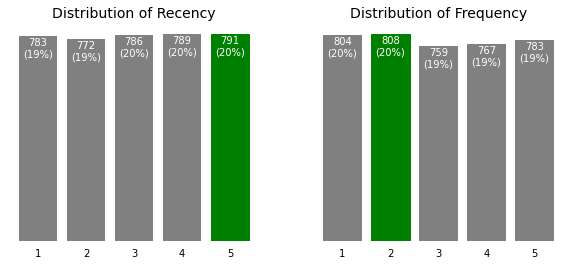

In [50]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='gray')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('green')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
        
plt.show()

#### Q. What do you observe with the above charts

 from the above charts we can observe that in the distribution of recency the max value is 791 , where as in the distribution of frquency the max value is 808.

In [51]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

can't loose          74
new customers       146
needs attention     486
loyal customers     722
champions          1012
at risk            1481
Name: Segment, dtype: int64

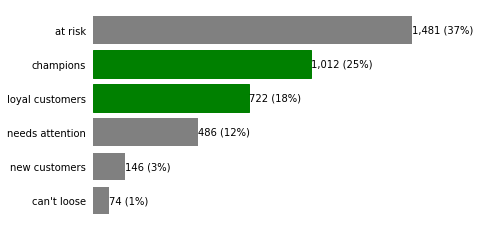

In [52]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

#### Q. Comment on the above chart

Highest number of customers are in the at risk category and least are in the can't lose category these two categories are imporatnt, we need to develop a special stragey to keep them with the company, champions category is in the seocond place and the loyal customers category is in the third place, needs attention category is in the 4 th place and new customers is in the 5th place.

Based on the category and the number of people in that category we should have a specified strategy for them.

#### Q. Who are the best customers?

the best customers are the ones with the more rfm value here the best customers are the champions category and the loyal customers category

In [53]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
18102.0,0,431,259657,5,5,5,555,champions
17450.0,8,337,194550,5,5,5,555,champions
17511.0,2,963,91062,5,5,5,555,champions
16684.0,4,277,66653,5,5,5,555,champions
14096.0,4,5111,65164,5,5,5,555,champions


#### Q. Which customers are likely to churn?
- Customers who are likely to churn means those customers who has not bought any product for a long time. This is showed in terms of recency, where the value is less than 1 for the customer. These are customers who are likely to churn.

In [54]:
#Customers who's recency value is low

rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183,1,1,5,115,at risk
15749.0,235,10,44534,1,1,5,115,at risk
15098.0,182,3,39916,1,1,5,115,at risk
13093.0,275,159,7832,1,5,5,155,can't loose
17850.0,372,297,5391,1,5,5,155,can't loose


#### Q. Which customers we are going to loose?
- CUstomers with low RFM score are the customers we are going to lose. Which means customers who has not bought any product for a long time, even the customer bought a product the frequency and monetary is also low. Following tablw shows the customers we are going to lose.

In [55]:
#Customers who's recency, frequency and monetary values are low 

rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13747.0,373,1,79,1,1,1,111,at risk
14237.0,373,9,161,1,1,1,111,at risk
17643.0,373,8,101,1,1,1,111,at risk
15350.0,373,5,115,1,1,1,111,at risk
13011.0,372,3,50,1,1,1,111,at risk


#### Q. Who are the loyal customers?
- Customers whose recency is low and high frequency & high monetary value are loyal customers. We have calculated those customers with frequency more than 3. Following table shows the loyal customers.

In [56]:
#Customers with high frequency value

rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
18102.0,0,431,259657,5,5,5,555,champions
17450.0,8,337,194550,5,5,5,555,champions
17511.0,2,963,91062,5,5,5,555,champions
16029.0,38,242,81024,3,5,5,355,loyal customers
16684.0,4,277,66653,5,5,5,555,champions


## Calculate RFM scores using 4 quintiles instead of 5 and answer all the questions again
- Make sure you give proper names to the segments. Please create 4 segments based on R and F scores instead of 6


In [57]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles_1 = rfm[['recency', 'frequency', 'monetary']].quantile([.25, .5, .75]).to_dict()
quintiles_1

{'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'monetary': {0.25: 300.0, 0.5: 651.0, 0.75: 1575.0}}

In [58]:
def r_score(x):
    if x <= quintiles_1['recency'][.25]:
        return 4
    elif x <= quintiles_1['recency'][.5]:
        return 3
    elif x <= quintiles_1['recency'][.75]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles_1[c][.25]:
        return 1
    elif x <= quintiles_1[c][.5]:
        return 2
    elif x <= quintiles_1[c][.75]:
        return 3
    else:
        return 4  

In [59]:
rfm['R_1'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F_1'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M_1'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [60]:
rfm['RFM Score'] = rfm['R_1'].map(str) + rfm['F_1'].map(str) + rfm['M_1'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment,R_1,F_1,M_1
CustomerID,,,,,,,,,,,
12346.0,325,1,77183,1,1,5,114,at risk,1,1,4
12747.0,2,103,4196,5,4,5,444,champions,4,4,4
12748.0,0,4596,33719,5,5,5,444,champions,4,4,4
12749.0,3,199,4090,5,5,5,444,champions,4,4,4
12820.0,3,59,942,5,4,4,433,champions,4,3,3


In [61]:
segments = {
    '[1-2][1-4]': 'at risk',
    '3[3-4]': 'loyal customers',
    '[3-4][1-2]': 'new customers',
    '4[3-4]': 'Best Customers'
    
}

rfm['Segment'] = rfm['R_1'].map(str) + rfm['F_1'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment,R_1,F_1,M_1
CustomerID,,,,,,,,,,,
12346.0,325,1,77183,1,1,5,114,at risk,1,1,4
12747.0,2,103,4196,5,4,5,444,Best Customers,4,4,4
12748.0,0,4596,33719,5,5,5,444,Best Customers,4,4,4
12749.0,3,199,4090,5,5,5,444,Best Customers,4,4,4
12820.0,3,59,942,5,4,4,433,Best Customers,4,3,3


In [62]:
rfm_1 = rfm.drop(columns = ['R', 'F', 'M'])

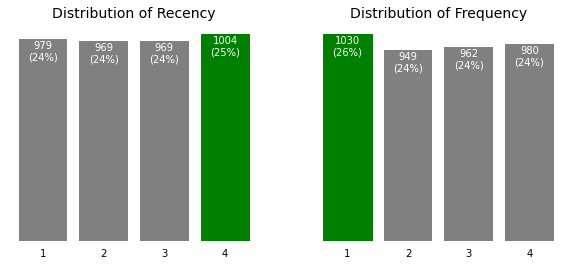

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R_1', 'F_1']):
    parameters = {'R_1':'Recency', 'F_1':'Frequency'}
    y = rfm_1[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='gray')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('green')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
        
plt.show()

We can observe that after dividing the overall data into 4 quntiles the recency is high in the fourth qunitle and the frequency is more in the first quntile, from this we can say that the recent purchase customers are more in the foruth qunitle set of data and the frequnet customers are more in the first quntile set of data.

In [64]:
segments_counts_1 = rfm_1['Segment'].value_counts().sort_values(ascending=True)

segments_counts_1

loyal customers     584
new customers       628
Best Customers      761
at risk            1948
Name: Segment, dtype: int64

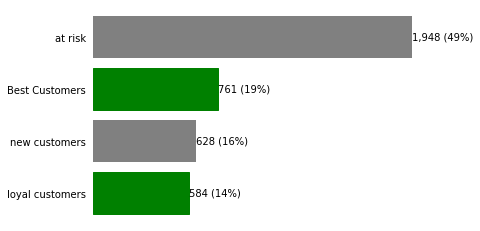

In [65]:
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts_1)),
              segments_counts_1,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts_1)))
ax.set_yticklabels(segments_counts_1.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts_1.index[i] in ['Best Customers', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts_1.sum())),
                va='center',
                ha='left'
               )

plt.show()

from the above chart we can say that nearly half of the customers fall under the "at risk" category, followed by the "Best customers" category and the "new customers" category the "loyal customeres" cateogry is in the last place.

#### Q. Who are the best customers?
- Customers whose rank of RFM is 444 are the best customers, because the recency is low, they are frequent buyers and generating high moetary value.

In [66]:
rfm_1[rfm_1['RFM Score']=='444'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,RFM Score,Segment,R_1,F_1,M_1
CustomerID,,,,,,,,
18102.0,0,431,259657,444,Best Customers,4,4,4
17450.0,8,337,194550,444,Best Customers,4,4,4
17511.0,2,963,91062,444,Best Customers,4,4,4
16684.0,4,277,66653,444,Best Customers,4,4,4
14096.0,4,5111,65164,444,Best Customers,4,4,4


#### Q. Which customers are likely to churn?
- Customers with more recency value, which means the customers who has not bought any product for the long time. Here are the customers with recency rank 1, who are likely to churn.

In [67]:
rfm_1[rfm_1['R_1'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,RFM Score,Segment,R_1,F_1,M_1
CustomerID,,,,,,,,
12346.0,325,1,77183,114,at risk,1,1,4
15749.0,235,10,44534,114,at risk,1,1,4
15098.0,182,3,39916,114,at risk,1,1,4
13093.0,275,159,7832,144,at risk,1,4,4
12980.0,157,20,7374,124,at risk,1,2,4


#### Q. Which customers we are going to loose?
- Customers whose recency value is high, frequency is low and monetary is low. Which means the customers who has not bought any product for a long time, even they buy the frequency and monetary is less. According to our ranking customers whose rfm score is 111 are customers who we are going to lose.

In [68]:
rfm_1[rfm_1['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,RFM Score,Segment,R_1,F_1,M_1
CustomerID,,,,,,,,
13065.0,373,14,205,111,at risk,1,1,1
16583.0,373,14,233,111,at risk,1,1,1
16048.0,373,8,256,111,at risk,1,1,1
13747.0,373,1,79,111,at risk,1,1,1
17643.0,373,8,101,111,at risk,1,1,1


#### Q. Who are the loyal customers?
- Loyal Customers are those customers whose frequency is high. Which means though their recency score is relatively less, their frequency is high.

In [69]:
rfm_1[rfm_1['F_1'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,RFM Score,Segment,R_1,F_1,M_1
CustomerID,,,,,,,,
18102.0,0,431,259657,444,Best Customers,4,4,4
17450.0,8,337,194550,444,Best Customers,4,4,4
17511.0,2,963,91062,444,Best Customers,4,4,4
16029.0,38,242,81024,344,loyal customers,3,4,4
16684.0,4,277,66653,444,Best Customers,4,4,4


## Can you create segments based on F and M scores. This is an extra exercise for groups who want to try more. It is not mandatory.

In [70]:
rfm = pd.read_csv('rfm.csv', index_col ='CustomerID')

In [71]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


<AxesSubplot:>

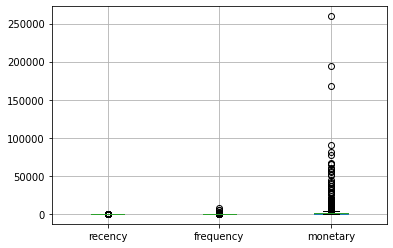

In [72]:
# Create box plots to check for outliers
rfm.boxplot()

In [73]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

[[2.34412669e+00 4.10395112e-01 1.00681678e+01]
 [9.01587778e-01 5.79924468e-02 3.11801579e-01]
 [9.21685081e-01 2.06900052e+01 4.25821942e+00]
 ...
 [8.51344520e-01 3.59882729e-01 2.25295154e-01]
 [8.91539127e-01 3.05659123e+00 3.08216554e-02]
 [4.99641715e-01 9.35447047e-02 3.53221728e-03]]


In [74]:
rfm_clean = rfm[(z < 3).all(axis=1)]

### Q. What is the purpose of the above code
First we have plotted the box plot and identified the ouliers. Then we have calculated the z scores for recency, frequency, and monetary. Using the above code we are trying to eliminate the outliers in the dataset.

In [75]:
rfm.shape

(3921, 3)

In [76]:
rfm_clean.shape

(3868, 3)

### Q. Create box plot to check for outliers with the cleaned data and comment on it. Compare it with the previous box plot.

<AxesSubplot:>

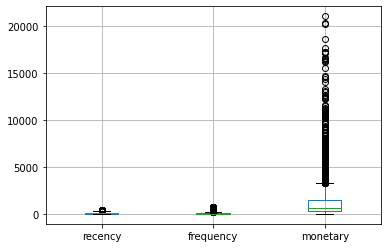

In [77]:
rfm_clean.boxplot()

Using z score we have removed the outliers whose values are less than 3. There is a small from the previous box plot to this. Even in this box plot there are outliers but we have removed potential outliers which is creatting the skewness in the distribution.

### Q. Create the Histogram for R, F, and M for the cleaned data. Comment on them and compare them with the previous histograms


array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

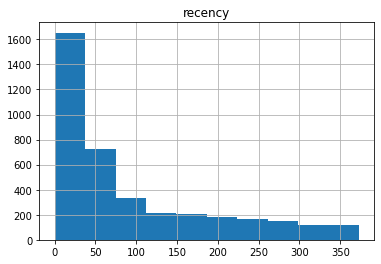

In [78]:
rfm_clean.hist(column='recency')

The above histogram shows that most of the customers fall within the recency of 0 to 50 days. As the recency increased number of customers decresed who fall in that region. 

Recency histogram of original rfm and the histogram of rfm clean data looks similar. This shows that there are no outliers in the recency.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

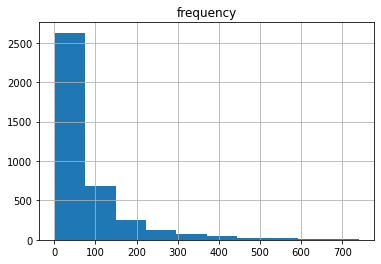

In [79]:
rfm_clean.hist(column='frequency')

This histogram shows how are customers are spread in terms of frequency. Most of the customers fall under 100 purchases of frequency. And the spread is till 700.

If we compare with the previous histogram which is highly skewed because of outliers, even after removing most of the outliers we can still see it is skewed but it is more inclined to normal distribution.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

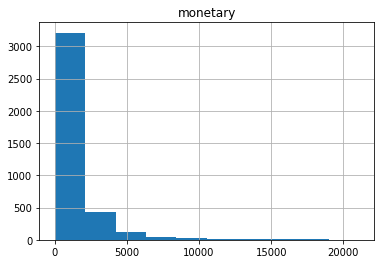

In [80]:
rfm_clean.hist(column='monetary')

The abovehistogram shows number of customers and their monetary value. After removing outliers all customers fall under 20000 monetary value and most of the customers fall under 3000.

When we compare this histogram with the previous one which is highly skewed because of outliers, is now more normally distributted

## Perform cluster analysis using K-means clustering with the original rfm dataframe

In [81]:
X = rfm

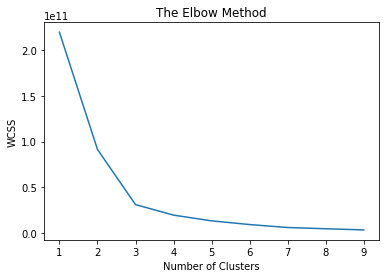

In [82]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

In [84]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [85]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
12346.0,325,1,77183,1
12747.0,2,103,4196,0
12748.0,0,4596,33719,1
12749.0,3,199,4090,0
12820.0,3,59,942,0


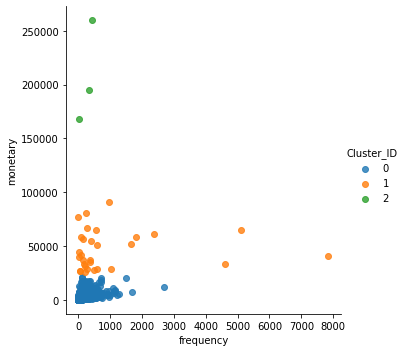

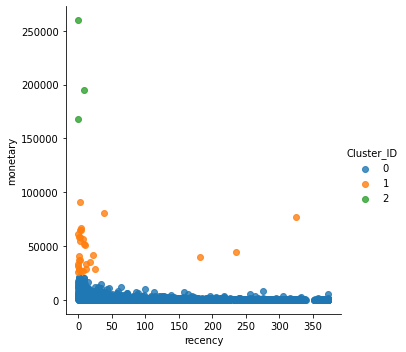

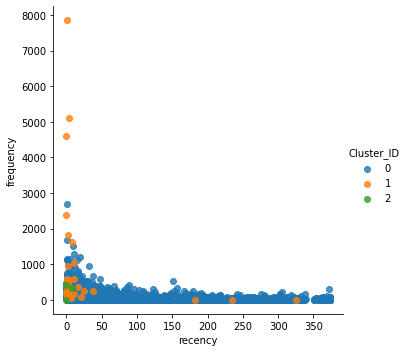

In [86]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

We have used elbow method to determine 3 clusters to be formed. We have implemented and plotted various scatter plots. 

When it comes to frequency vs monetary, the clusters are clear. It represents customers purchase frequecy and their monetary value. CLuster green represents customers with low frequency but high monetary value purchase. Orange cluster shows those customers with high frequency and moderate monetary value. BLue cluster shows those customers whose frequency is low as well as monetary.

Next plot is recency vs monetary, the clusters are relatively clear. It represents days elapsed between present and last purchase by customer and their monetary value. As the recency increased monetary decreased. Green cluster represents those customers whose recency is low (which is good) and have high monetary value. Orange cluster shows the customers whose recency is low and monetary is moderate. Blue cluster shows those customers whose recency is low and monetary is also low.

Final plot is recency vs frequency, the clusters are not clear. It represents days elapsed between present and last purchase by customer and purchase frequency. It is very hard to distinguish the clusters clearly.

In all the graphs most of the customers fall in blue cluster, next orange and finally green clusters.

### Q. Comment on the plots

### Q. Perform Cluster Analysis with k=4


In [87]:
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(X)

In [88]:
rfm['Cluster_ID'] = y_kmeans
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
12346.0,325,1,77183,1
12747.0,2,103,4196,0
12748.0,0,4596,33719,1
12749.0,3,199,4090,0
12820.0,3,59,942,0


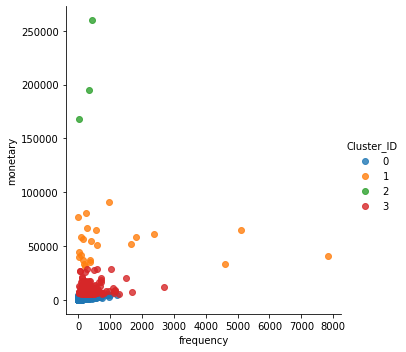

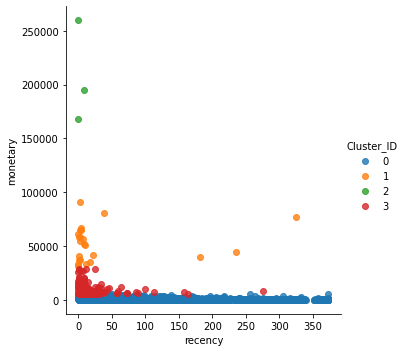

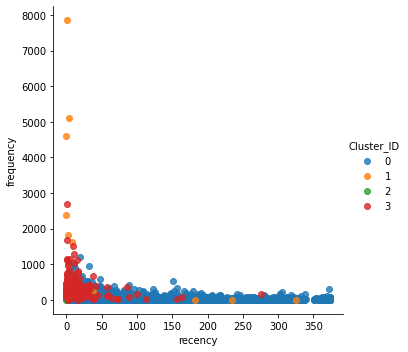

In [89]:
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

Now we have just randomly assigned k value as 4. Earlier only recency vs frequency plot was not able to understand. Now even frequency vs recency is hard to distinguish the clusters. We can clearly distinguish the clusters in recency vs monetary plot.

It represents days elapsed between present and last purchase by customer and their monetary value. As the recency increased monetary decreased. Green cluster represents those customers whose recency is low (which is good) and have high monetary value. Orange cluster shows the customers whose recency is low and monetary is moderate. Red and Blue cluster shows those customers whose recency is low and monetary is also low.

### Q. Perform cluster analysis with the outliers removed rfm dataframe. Follow exactly the same steps including the elbow method and plot the graphs and comment on the plots. You decide what k value you should use.

In [87]:
X1 = rfm_clean

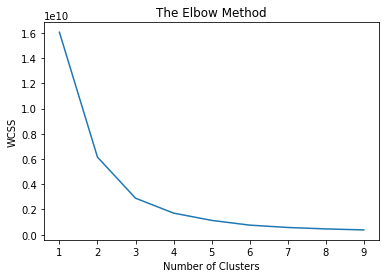

In [88]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [89]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X1)

In [90]:
rfm_clean['Cluster_ID'] = y_kmeans

C:\Users\saisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


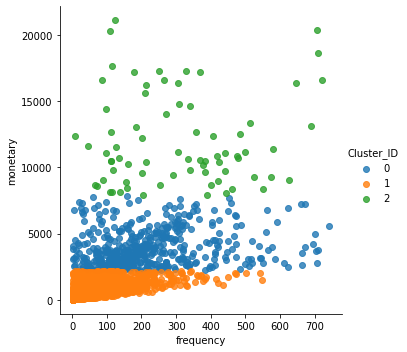

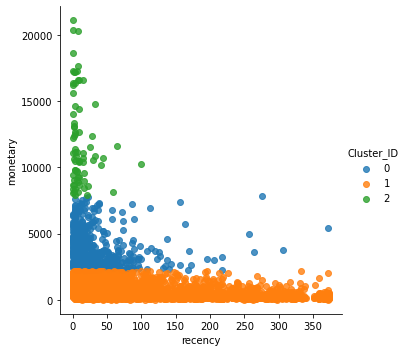

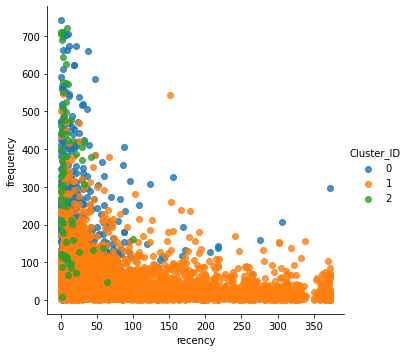

In [91]:
facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

We have used elbow method to determine 3 clusters to be formed for cleansed dataset. We have implemented and plotted various scatter plots. 

When it comes to frequency vs monetary, the clusters are clear. It represents customers purchase frequecy and their monetary value. CLuster green represents customers with high frequency but high monetary value purchase. Orange cluster shows those customers with high frequency and moderate monetary value. BLue cluster shows those customers whose frequency is low as well as monetary. If we compare with earlier scatter plot, due to outliers only few customers fell into green cluster.

Next plot is recency vs monetary, the clusters are relatively clear. It represents days elapsed between present and last purchase by customer and their monetary value. As the recency increased monetary decreased. Green cluster represents those customers whose recency is low (which is good) and have high monetary value. Orange cluster shows the customers whose recency is low and monetary is moderate. Blue cluster shows those customers whose recency is low and monetary is also low. Even for this plot as we removed outliers the formation of clusters are clearer.

Final plot is recency vs frequency, the clusters are not clear. It represents days elapsed between present and last purchase by customer and purchase frequency. It is very hard to distinguish the clusters clearly. Even though we have removed the outliers the clusters division is not clear to distinguish.

In all the graphs most of the customers fall in blue cluster, next orange and finally green clusters.

In [92]:
# Calculate mean for every cluster 
for i in range(4):
    rfm_clean_mean= rfm_clean.groupby(['Cluster_ID']).mean()

rfm_clean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,31.776173,206.916968,3754.850181
1,104.965123,50.207407,667.638272
2,11.432432,309.513514,12022.202703


## Perform cluster analysis using hierarchical clustering with the cleaned rfm dataframe

In [96]:
# Import the libraries
import scipy.cluster.hierarchy as sch

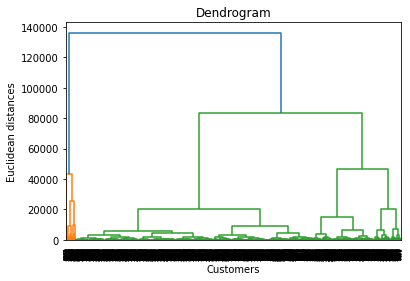

In [97]:
# Build a dendrogram using the minimum variance method
dendrogram = sch.dendrogram(sch.linkage(X1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [98]:
## Identify the clusters based on dendrogram

In [99]:
# Train the hierarchical clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X1)

In [100]:
X1['Cluster_ID'] = y_hc

C:\Users\saisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
X1.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
12747.0,2,103,4196,0
12749.0,3,199,4090,0
12820.0,3,59,942,0
12821.0,214,6,92,0
12822.0,70,46,948,0


### Q. Create all the three plots again. Do you observe any differences from k-means clustering method


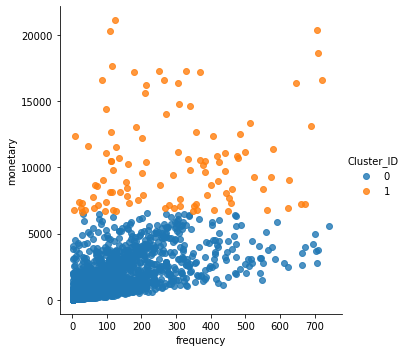

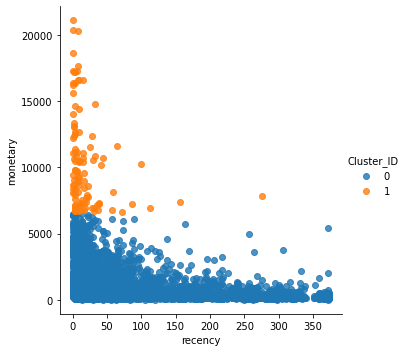

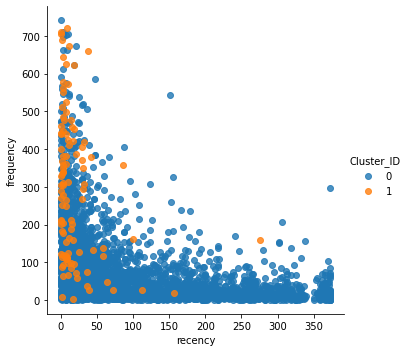

In [102]:
facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

Here we have used heirarichal clustering method to form the clusters. Using dendogram we have determined to use 2 clusters and form it useing agglomerative clustering. When we compare this method of clustering with k means, the clusters are much clear and easy to distinguish.

When it comes to frequency vs monetary, the clusters are clear. It represents customers purchase frequecy and their monetary value. CLuster orange represents customers with high frequency but high monetary value purchase. Blue cluster shows those customers with relatively low frequency and moderate monetary value. 

Next plot is recency vs monetary, the clusters are relatively clear. It represents days elapsed between present and last purchase by customer and their monetary value. As the recency increased monetary decreased. Orange cluster represents those customers whose recency is low (which is good) and have high monetary value. Blue cluster shows the customers whose recency is low and monetary is comparitively low. 

Final plot is recency vs frequency, the clusters are not that clear. It represents days elapsed between present and last purchase by customer and purchase frequency. It is very hard to distinguish the clusters clearly. Even though we have used heirarichal method to form the clusters, most of the points in this plot are in both cluster space.


## Evaluate Clustering 


In [103]:
# Import libraries
from sklearn import cluster
from sklearn import metrics

In [104]:
# Calculate Silhouette score for different cluster values
krange = list(range(2,5))
avg_silhouettes = []
for n in krange:
  model = cluster.KMeans(n_clusters=n, random_state=10)
  cluster_assignments = model.fit_predict(X1)

  silhouette_avg = metrics.silhouette_score(X1, cluster_assignments)
  avg_silhouettes.append(silhouette_avg)

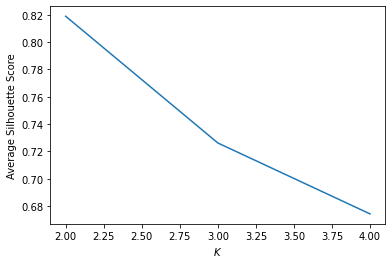

In [105]:
# PLot the score
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()